# <center> DROWSINESS DETECTION USING OPENCV </center>

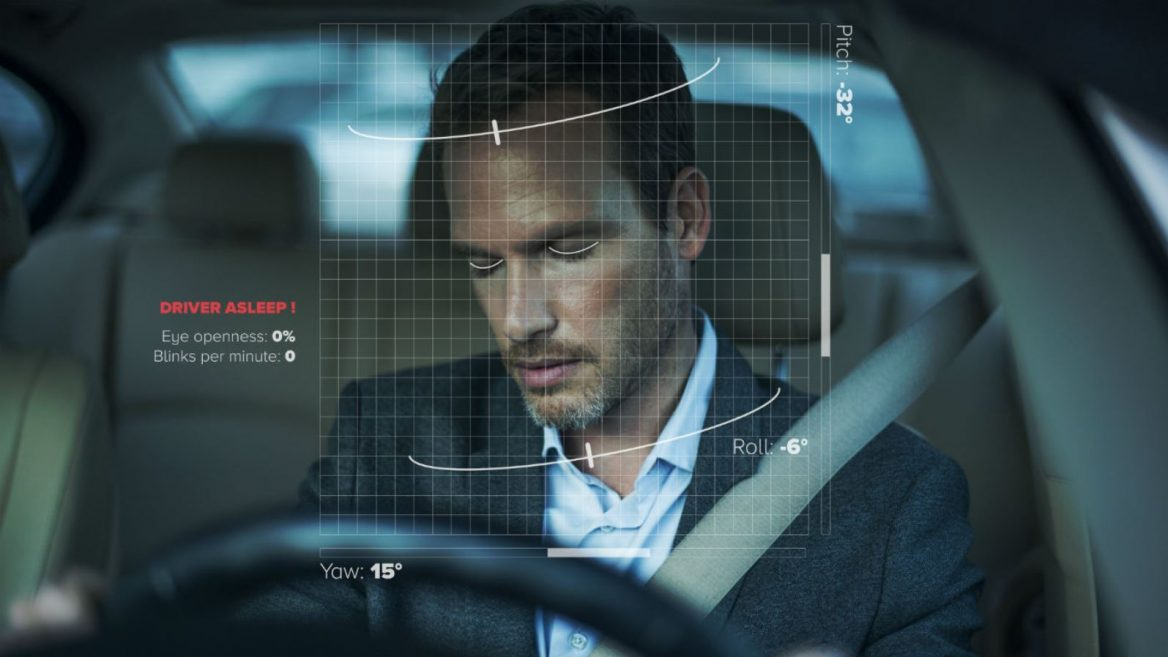

* **IMPORTING THE LIBRARIES** 
* **ADDING SOUND AND IMPORTING HAAR CASCADING MODEL**
* **IMPLEMENTATION**
* **GRADIO IMPLEMENTATION**

# IMPORTING THE LIBRARIES

In [31]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

# ADDING SOUND AND IMPORTING HAAR CASCADE MODEL

In [32]:
mixer.init()
sound = mixer.Sound('Drowsiness/alarm.wav')

face = cv2.CascadeClassifier('Drowsiness/haar cascade files/haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('Drowsiness/haar cascade files/haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('Drowsiness/haar cascade files/haarcascade_righteye_2splits.xml')


model = load_model('Drowsiness/drowsy.h5')


font = cv2.FONT_HERSHEY_COMPLEX_SMALL


# IMPLEMENTATION

In [33]:
def pred():
    cap = cv2.VideoCapture(0)
    count=0
    score=0
    thicc=2
    rpred=[99]
    lpred=[99]
    
    while(True):
        ret, frame = cap.read()
        height,width = frame.shape[:2] 

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
        left_eye = leye.detectMultiScale(gray)
        right_eye =  reye.detectMultiScale(gray)

        cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

        for (x,y,w,h) in right_eye:
            r_eye=frame[y:y+h,x:x+w]
            count=count+1
            r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
            r_eye = cv2.resize(r_eye,(24,24))
            r_eye= r_eye/255
            r_eye=  r_eye.reshape(24,24,-1)
            r_eye = np.expand_dims(r_eye,axis=0)
            rpred = model.predict(r_eye)
            b=np.argmax(rpred)
            if(b==1):
                lbl='Awake' 
            if(b==0):
                lbl='Drowsy'
            break

        for (x,y,w,h) in left_eye:
            l_eye=frame[y:y+h,x:x+w]
            count=count+1
            l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
            l_eye = cv2.resize(l_eye,(24,24))
            l_eye= l_eye/255
            l_eye=l_eye.reshape(24,24,-1)
            l_eye = np.expand_dims(l_eye,axis=0)
            lpred = model.predict(l_eye)
            a=np.argmax(lpred)
            if(a==1):
                lbl='Awake'   
            if(a==0):
                lbl='Drowsy'
            break

        if(b==0 and a==0):
            score=score+1
            cv2.putText(frame,"Drowsy",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
        
        else:
            score=score-1
            cv2.putText(frame,"Awake",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
        
            
        if(score<0):
            score=0   
        cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
        if(score>15):
            #person is feeling sleepy so we beep the alarm
            path="Drowsiness/"
            cv2.imwrite(os.path.join(path,'image.jpg'),frame)
            try:
                sound.play()
                
            except:  # isplaying = False
                pass
            if(thicc<16):
                thicc= thicc+2
            else:
                thicc=thicc-2
                if(thicc<2):
                    thicc=2
            cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [34]:
pred()

1/1 [==============================] - 0s 31ms/step


# GRADIO IMPLEMENTATION

In [6]:
!pip install gradio

Error processing line 1 of C:\Users\melvi\anaconda3\lib\site-packages\vision-1.0.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\melvi\anaconda3\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [19]:
import gradio as gr

In [28]:
interface=gr.Interface(fn=pred, inputs=None , outputs="image", live=True,title="Drowsiness Detection")


In [ ]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 [==============================] - 0s 30ms/step
